In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import cassiopeia as cas
import pandas as pd
import numpy as np
import seaborn as sns
from ete3 import Tree, ClusterTree, TreeStyle, faces
from ete3.treeview.faces import add_face_to_node
import pickle
import matplotlib.pyplot as plt
import scipy

In [2]:
outFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/tree_plots/'
outSizeLen = 10
outSizeHeight = 10

clusterColorsFile = "/Genomics/chanlab/mchan/Adriano/TLS/TLS_TLSCL/20211102_clusterColorsTLSCL.p"
with open(clusterColorsFile,'rb') as fp:
    clusterDict = pickle.load(fp)
    
TLS_barcodes = ['Bar1', 'Bar2', 'Bar3']
TLSCL_barcodes = ['Bar4', 'Bar5', 'Bar6']
barcodes = TLS_barcodes + TLSCL_barcodes

Timepoints = ['120', '144', '120_144']

total_cell_state_table = pd.read_csv('/Genomics/chanlab/blaw/TLS/metadata/TLS_Explant_Total_cellBC_cellState.tst', sep = '\t')

# Label the trees

In [3]:
# Label internal nodes
def nameInteriorNodes(nwkFile,outnwkFile):

    t = Tree(nwkFile,format=1)
    labelID = 0

    for node in t.traverse():
        if node.is_leaf() == False:
            node.name = "node{}".format(labelID)
            labelID = labelID + 1

    t.write(format=8,outfile=outnwkFile)

In [4]:
def add_node0(nwkFile, outnwkFile):
    infile = open(nwkFile, 'r')
    outfile = open(outnwkFile, 'w')
    
    outfile.write(infile.readline()[:-1])
    outfile.write('node0;')
          
    infile.close()
    outfile.close()

In [17]:
# Label the greedy trees, ALREADY DONE
'''
for barcode in barcodes:
    for time in Timepoints:
        nameInteriorNodes('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/greedy/{}_{}_greedy_newick_noMutationlessEdges.txt'.format(barcode, time, barcode, time),
                          '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/greedy/{}_{}_greedy_node0_missing.txt'.format(barcode, time, barcode, time))

        add_node0('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/greedy/{}_{}_greedy_node0_missing.txt'.format(barcode, time, barcode, time),
                  '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/greedy/{}_{}_greedy_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, time, barcode, time))
'''

In [7]:
# Label the neighbor trees
'''
for barcode in barcodes:
    for time in ['120', '144', '120_144']:
        nameInteriorNodes('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/neighbor/{}_{}_neighbor_newick_noMutationlessEdges.txt'.format(barcode, time, barcode, time),
                          '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/neighbor/{}_{}_neighbor_node0_missing.txt'.format(barcode, time, barcode, time))

        add_node0('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/neighbor/{}_{}_neighbor_node0_missing.txt'.format(barcode, time, barcode, time),
                  '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/neighbor/{}_{}_neighbor_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, time, barcode, time))
                  
'''

In [9]:
# Label the hybrid trees
for barcode in barcodes:
    for time in ['120', '144', '120_144']:
        nameInteriorNodes('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_hybrid_newick_noMutationlessEdges.txt'.format(barcode, time, barcode, time),
                          '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_hybrid_node0_missing.txt'.format(barcode, time, barcode, time))

        add_node0('/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_hybrid_node0_missing.txt'.format(barcode, time, barcode, time),
                  '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, time, barcode, time))

# Plot the hybrid trees from the combined timepoint

In [10]:
colorDict = {}

for i in clusterDict.keys():
    colorDict[i] = matplotlib.colors.to_hex(clusterDict[i], keep_alpha=False)
    
timeDict = {'120h': '#29BAFF', '144h': '#151E82'}

------------------Bar1-Cell_States----------------------
iTOL output: SUCCESS: 12811211774381991690296599

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774381991690296599&restore_saved=1
Warnings: []
------------------Bar1-Timepoint----------------------
iTOL output: SUCCESS: 12811211774383401690296616

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774383401690296616&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/50491 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:09<00:00,  3.15it/s]


------------------Bar2-Cell_States----------------------
iTOL output: SUCCESS: 12811211774416601690296884

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774416601690296884&restore_saved=1
Warnings: []
------------------Bar2-Timepoint----------------------
iTOL output: SUCCESS: 12811211774417471690296895

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774417471690296895&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/28684 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.35it/s]


------------------Bar3-Cell_States----------------------
iTOL output: SUCCESS: 12811211774463061690297069

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774463061690297069&restore_saved=1
Warnings: []
------------------Bar3-Timepoint----------------------
iTOL output: SUCCESS: 12811211774465311690297080

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774465311690297080&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/32420 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.88it/s]


------------------Bar4-Cell_States----------------------
iTOL output: SUCCESS: 1281121177431541690297258

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=1281121177431541690297258&restore_saved=1
Warnings: []
------------------Bar4-Timepoint----------------------
iTOL output: SUCCESS: 1281121177435771690297271

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=1281121177435771690297271&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/21796 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.13it/s]


------------------Bar5-Cell_States----------------------
iTOL output: SUCCESS: 1281121177473271690297422

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=1281121177473271690297422&restore_saved=1
Warnings: []
------------------Bar5-Timepoint----------------------
iTOL output: SUCCESS: 1281121177479681690297433

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=1281121177479681690297433&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/20343 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.08it/s]


------------------Bar6-Cell_States----------------------
iTOL output: SUCCESS: 12811211774113511690297568

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774113511690297568&restore_saved=1
Warnings: []
------------------Bar6-Timepoint----------------------
iTOL output: SUCCESS: 12811211774118171690297573

Tree Web Page URL: http://itol.embl.de/external.cgi?tree=12811211774118171690297573&restore_saved=1
Warnings: []


filling in multiindex table:   0%|          | 0/5090 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.08it/s]


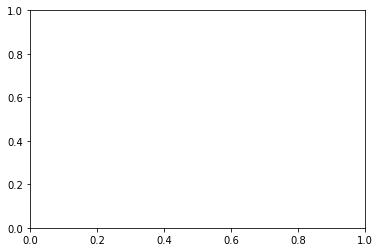

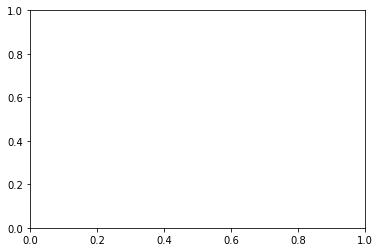

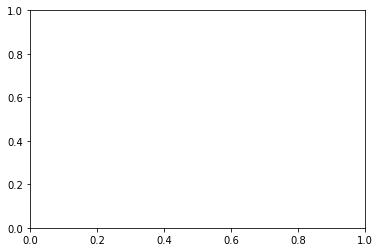

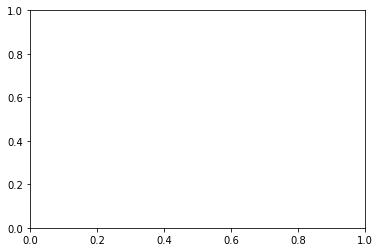

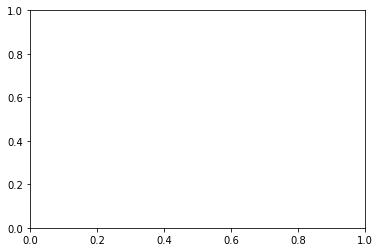

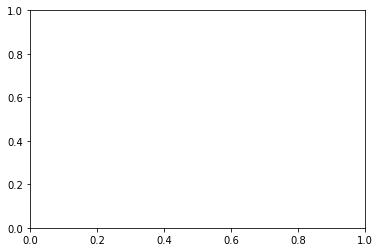

In [12]:
for barcode in barcodes:
    time = '120_144'
    nwkFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, time, barcode, time)
    metadataFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_metadata.txt'.format(barcode, time, barcode, time)
    characterFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_character_matrix.txt'.format(barcode, time, barcode, time)
    prior_file = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/hybrid/{}_{}_priors.pickle'.format(barcode, time, barcode, time)
    allele_table_file = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/{}/{}_{}_allele_table.txt'.format(barcode, time, barcode, time)

    allele_table = pd.read_csv(allele_table_file, index_col = 0)
    t = Tree(nwkFile, format=1)
    tree_meta = pd.read_csv(metadataFile, sep='\t')
    character_matrix = pd.read_csv(characterFile, sep='\t', index_col = 0)

    with open(prior_file, 'rb') as f:
        priors = pickle.load(f)

    tree = cas.data.CassiopeiaTree(character_matrix=character_matrix, priors=priors, tree = t)

    missing_proportion = (character_matrix == -1).sum(axis=0) / character_matrix.shape[0]
    uncut_proportion = (character_matrix == 0).sum(axis=0) / character_matrix.shape[0]
    n_unique_states = character_matrix.apply(lambda x: len(np.unique(x[(x != 0) & (x != -1)])), axis=0)

    tree.parameters['stochastic_missing_probability'] = 0.1

    character_meta = pd.DataFrame([missing_proportion, uncut_proportion, n_unique_states], index = ['missing_prop', 'uncut_prop', 'n_unique_states']).T
    tree.cell_meta = tree_meta
    tree.character_meta = character_meta
    tree.cell_meta['cell_state'] = [i[2:-2] for i in tree.cell_meta['cell_state']]
    tree.cell_meta['Timepoint'] = [i[2:-2] for i in tree.cell_meta['Timepoint']]
    tree.cell_meta['orig.ident'] = [i[2:-2] for i in tree.cell_meta['orig.ident']]

    tree.cell_meta.set_index('cellBC', inplace =True)
    
    test_palette = []
    for i in colorDict.keys():
        test_palette.append(colorDict[i])

    values = tree.cell_meta['cell_state']

    colors = test_palette[: len(values.unique())]
    colormap = dict(zip(np.unique(values), colors))

    final_palette = []
    for i in colormap.keys():
        final_palette.append(colorDict[i])

    print('------------------{}-Cell_States----------------------'.format(barcode))    
    cas.pl.upload_and_export_itol(tree, '{}_{}_hybrid_cell_states'.format(barcode, time), api_key = 'jtMaYpxAc94ImqU7xJjubQ',
                          project_name = 'Explant', export_filepath='/Genomics/chanlab/blaw/TLS/data/explant/lineage/tree_plots/cell_states/{}_{}_hybrid_cell_states.pdf'.format(barcode, time), 
                          meta_data = ['cell_state'], palette = final_palette)
    
    print('------------------{}-Timepoint----------------------'.format(barcode))  
    
    test_palette_time = []
    for i in timeDict.keys():
        test_palette_time.append(timeDict[i])

    values_time = tree.cell_meta['Timepoint']

    colors_time = test_palette_time[: len(values_time.unique())]
    colormap_time = dict(zip(np.unique(values_time), colors_time))

    final_palette_time = []
    for i in colormap_time.keys():
        final_palette_time.append(timeDict[i])
        
    cas.pl.upload_and_export_itol(tree, '{}_{}_hybrid_Timepoint'.format(barcode, time), api_key = 'jtMaYpxAc94ImqU7xJjubQ',
                          project_name = 'Explant', export_filepath='/Genomics/chanlab/blaw/TLS/data/explant/lineage/tree_plots/timepoint/{}_{}_hybrid_timepoint.pdf'.format(barcode, time), 
                          meta_data = ['Timepoint'], palette = final_palette_time)

    # plot indel heatmap
    fig, ax = plt.subplots()
    if time == '120_144':
        g = cas.pl.plot_matplotlib(tree, allele_table = allele_table, orient = 'right', figsize = (10, 60), meta_data = ['Timepoint'])
    else:
        g = cas.pl.plot_matplotlib(tree, allele_table = allele_table, orient = 'right', figsize = (10, 60))
    plt.savefig('/Genomics/chanlab/blaw/TLS/data/explant/lineage/tree_plots/indel_heatmap/{}_{}_hybrid_Indel_Heatmap.pdf'.format(barcode, time), dpi = 300)
    #plt.show()
    plt.close()

# Plot trees with the branches colored by node time

- To accomplish this, I need to make a node metadata table that I can upload to itol.
- For this, I need a table that contains the name of each node, and some information about 

In [13]:
node_info = pd.read_csv('/Genomics/chanlab/blaw/TLS/data/explant/progenitor_analysis/TLS_explant_hybrid_node_info.txt', sep = '\t')

# dict of colors to label branches and nodes
time_colors = {'120':'#e8e6e6', '120_144':'#000000', '144':'#e8e6e6'}

for barcode in barcodes:
    nwkFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, barcode)
    t = Tree(nwkFile, format = 1)

    node_names = []
    for node in t.traverse():
        if not node.is_leaf():
            node_names.append('{}_{}'.format(barcode, node.name))

    for leaf in t.get_leaves():
        node_names.append(leaf.name)

    # format columns for the itol metadata file
    node_meta = pd.DataFrame(index = node_names, columns = ['node_ID', 'type', 'color', 'label_or_style', 'size_factor'])
    
    for i in node_meta.index:
        info = []

        if i.startswith('T'):
            info.append(i)
        else:
            info.append(i.split('_')[1])

        info.append('branch')

        if i.startswith('T'):
            info.append(time_colors[str(total_cell_state_table[total_cell_state_table['cellBC'] == i]['timepoint'].tolist()[0])])
        else:
            if i.endswith('node0'):
                info.append(time_colors['120_144'])
            else:
                node_time = node_info[node_info['node_name'] == i]['Node_Time'].tolist()[0]
                info.append(time_colors[node_time])

        info.append('normal')
        info.append(1)

        node_meta.loc[i] = info
        
    node_meta.to_csv('/Genomics/chanlab/blaw/TLS/data/explant/lineage/tree_plots/{}_colors_nodemeta.txt'.format(barcode), index = False)

# Make node meta table:

In [ ]:
def nodeClusterProfile(node, data, colName, df):
    if node.is_leaf():
        clusterID = data.loc[node.name, colName]
        df.loc[node.name, clusterID] = 1
        return 1
    else:
        daughters = node.children
        nodeNames = []
        for d in daughters:
            nodeClusterProfile(d, data, colName, df)
            nodeNames.append(d.name)
        df.loc[node.name, :] = df.loc[nodeNames, :].sum()
        return 1

def makeNodeMetaTable(nwkFile, metaFile, colName, outMetaFile):

    t = Tree(nwkFile,format=1)
    
    # get node names from tree;
    nodeNameList = []
    for node in t.traverse():
        nodeNameList.append(node.name)

    data = pd.read_csv(metaFile, sep = '\t')
    data.set_index("cellBC", inplace = True)

    clusterNames = data[colName].unique()
    df_meta = pd.DataFrame(columns = clusterNames, index = nodeNameList)
    df_meta.fillna(0, inplace = True)
    df_meta.index.name = "cellBC"

    nodeClusterProfile(t.get_tree_root(), data, colName, df_meta)
    df_meta.to_csv(outMetaFile, sep = "\t")

In [7]:
for barcode in barcodes:
    nwkFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/{}/{}_120_144_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, barcode)
    metadataFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_metadata.txt'.format(barcode, barcode)

    makeNodeMetaTable(nwkFile,
                      metadataFile,
                      colName = 'cell_state',
                      outMetaFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_cell_state_node_table.txt'.format(barcode, barcode))

    makeNodeMetaTable(nwkFile,
                      metadataFile,
                      colName = 'Timepoint',
                      outMetaFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_timepoint_node_table.txt'.format(barcode, barcode))

# Plot ete tree with a piechart of cell states

In [46]:
def cell_state_mylayout(node):
    if node.is_leaf():
        color = timeDict[dataTime.columns[dataTime.loc[node.name,:] == 1][0]]
        add_face_to_node(faces.RectFace(3,1, color, color), node, column = 0, aligned = True)
    else:
        cvals = data.loc[node.name, colNames].values
        totalCells = float(cvals.sum())
        if totalCells == 0:
            print(node.name)
        pcts = (cvals / totalCells) * 100
        idx = np.nonzero(pcts)
        apct = [pcts[i] for i in idx[0]]
        acol = [colorDict[colNames[i]] for i in idx[0]]
        # scale size to total cells
        pSize = mCells / 100.
        #pSize = np.log2(totalCells+(mCells/1000.))*0.5
        pSize = np.log2(totalCells) #+(mCells/100.)) # works well
        pSize = 3 
        #pSize = np.log2(totalCells+0.1)
        if pSize<1:
            pSize=1

        if not node.is_root(): 
        # PieChartFace(percents,width,height,colors,line_color) 
            C = faces.PieChartFace(apct, colors = acol, width = pSize, height = pSize)
            C.border.width = None
            C.opacity = 0.8
            #faces.add_face_to_node(C,node,0,position="branch-bottom") # opt1: branch bottom
            faces.add_face_to_node(C, node, position="float", column=0) # opt2: float

    #daughters = node.children
    #for d in daughters:
        #dcol = lentiDict[dataLenti.loc[d.name,:].idxmax()]
        #nst1 = NodeStyle()
        #nst1["bgcolor"] = dcol
        #d.set_style(nst1)

    node.img_style["size"] = 0

In [48]:
for barcode in barcodes:
    nwkFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, barcode)

    clusterFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_cell_state_node_table.txt'.format(barcode, barcode)
    colorDictFile = '/Genomics/chanlab/blaw/TLS/sandbox/20211102_clusterColorsTLSCL.p'

    timepointFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_timepoint_node_table.txt'.format(barcode, barcode)

    outfile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/4_tree_plots/cell_state_pie/{}_120_144_hybrid_cell_state_pies.pdf'.format(barcode)
    outSizeLen = 80
    outSizeHeight = 80

    data = pd.read_csv(clusterFile, sep='\t', index_col = 0)
    data.columns = [i[2:-2] for i in data.columns]

    # import custom colormap for each cluster
    colorDictFile = "/Genomics/chanlab/mchan/Adriano/TLS/TLS_TLSCL/20211102_clusterColorsTLSCL.p"
    with open(colorDictFile,'rb') as fp:
        colorDict = pickle.load(fp)

    # import timepoints
    dataTime = pd.read_csv(timepointFile, sep='\t', index_col = 0)
    dataTime.columns = [i[2:-2] for i in dataTime.columns]
    timeDict = {'120h':'Red', '144h':'Black'}

    t = Tree(nwkFile, format = 1)

    data["totalCells"] = data.sum(axis = 1)
    colNames = data.columns[0:(data.shape[1]-1)].values
    mCells = data["totalCells"].max()

    ts = TreeStyle()
    ts.layout_fn = cell_state_mylayout
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.allow_face_overlap = True
    #ts.min_leaf_separation = 0
    ts.mode = "c"
    ts.arc_start = 90
    ts.arc_span = 340
    ts.show_scale = False

    t.render(file_name = outfile, w = outSizeLen, h = outSizeHeight, units = "in", tree_style = ts)

# Plot trees with the timepoints as pies on each node

In [39]:
def timepoint_mylayout(node):
    # color the leaves
    if node.is_leaf():
        color = stateDict[dataState.columns[dataState.loc[node.name,:] == 1][0]]
        add_face_to_node(faces.RectFace(3,1, color, color), node, column = 0, aligned = True)
    # color the nodes
    else:
        cvals = data.loc[node.name, colNames].values
        totalCells = float(cvals.sum())
        if totalCells == 0:
            print(node.name)
        pcts = (cvals / totalCells) * 100
        idx = np.nonzero(pcts)
        apct = [pcts[i] for i in idx[0]]
        acol = [colorDict[colNames[i]] for i in idx[0]]
        # scale size to total cells
        #pSize = mCells / 100.
        #pSize = np.log2(totalCells+(mCells/1000.))*0.5
        pSize = np.log2(totalCells) #+(mCells/100.)) # works well
        pSize = 3 
        #pSize = np.log2(totalCells+0.1)
        if pSize<1:
            pSize=1

        if not node.is_root(): 
        # PieChartFace(percents,width,height,colors,line_color) 
            C = faces.PieChartFace(apct, colors = acol, width = pSize, height = pSize)
            C.border.width = None
            C.opacity = 0.8
            #faces.add_face_to_node(C,node,0,position="branch-bottom") # opt1: branch bottom
            faces.add_face_to_node(C, node, position="float", column=0) # opt2: float

    #daughters = node.children
    #for d in daughters:
        #dcol = lentiDict[dataLenti.loc[d.name,:].idxmax()]
        #nst1 = NodeStyle()
        #nst1["bgcolor"] = dcol
        #d.set_style(nst1)

    node.img_style["size"] = 0

In [45]:
for barcode in barcodes:
    nwkFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_newick_noMutationlessEdges_Labeled.nwk'.format(barcode, barcode)

    clusterFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_cell_state_node_table.txt'.format(barcode, barcode)
    colorDictFile = '/Genomics/chanlab/blaw/TLS/sandbox/20211102_clusterColorsTLSCL.p'

    timepointFile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/3_lineage_reconstruction/{}/120_144/hybrid/{}_120_144_hybrid_timepoint_node_table.txt'.format(barcode, barcode)

    outfile = '/Genomics/chanlab/blaw/TLS/data/explant/lineage/4_tree_plots/timepoint_pie/{}_120_144_hybrid_timepoint_pies.pdf'.format(barcode)
    outSizeLen = 80
    outSizeHeight = 80

    data = pd.read_csv(timepointFile, sep='\t', index_col = 0)
    data.columns = [i[2:-2] for i in data.columns]
    colorDict = {'120h':'Red', '144h':'Black'}

    # import custom colormap for each cluster
    colorDictFile = "/Genomics/chanlab/mchan/Adriano/TLS/TLS_TLSCL/20211102_clusterColorsTLSCL.p"
    with open(colorDictFile,'rb') as fp:
        stateDict = pickle.load(fp)

    # import timepoints
    dataState = pd.read_csv(clusterFile, sep='\t', index_col = 0)
    dataState.columns = [i[2:-2] for i in dataState.columns]

    t = Tree(nwkFile, format = 1)

    data["totalCells"] = data.sum(axis = 1)
    colNames = data.columns[0:(data.shape[1]-1)].values
    mCells = data["totalCells"].max()

    ts = TreeStyle()
    ts.layout_fn = timepoint_mylayout
    ts.show_leaf_name = False
    ts.show_branch_length = False
    ts.allow_face_overlap = True
    #ts.min_leaf_separation = 0
    ts.mode = "c"
    ts.arc_start = 90
    ts.arc_span = 340
    ts.show_scale = False

    t.render(file_name = outfile, w = outSizeLen, h = outSizeHeight, units = "in", tree_style = ts)